<h1> Exploratory Data Analysis </h1>

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import datetime

import warnings
warnings.filterwarnings('ignore')


In [74]:
df = pd.read_csv("./cleaned_data.csv", index_col=0)

In [75]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
511205,08/02/2018,15:40,MANHATTAN,40.622476,-73.730705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
425974,12/22/2018,22:30,QUEENS,40.761780,-73.843590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
492340,09/07/2018,9:00,BROOKLYN,40.674683,-73.894600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10255,05/16/2021,15:00,BROOKLYN,40.666183,-73.868660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
503164,09/01/2018,15:02,BRONX,40.904140,-73.905014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
df.shape

(32382, 13)

In [77]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'LATITUDE', 'LONGITUDE',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED'],
      dtype='object')

In [78]:
df.isnull().sum()

CRASH DATE                       0
CRASH TIME                       0
BOROUGH                          0
LATITUDE                         0
LONGITUDE                        0
NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
dtype: int64

In [79]:
#Statistical Summary of our data
df.describe()

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
count,32382.000000,32382.000000,32382.000000,32382.000000,32382.000000,32382.000000,32382.00000,32382.000000,32382.000000,32382.000000
mean,40.622465,-73.730692,0.306683,0.001328,0.060342,0.000679,0.03715,0.000154,0.205083,0.000494
std,1.997762,3.624042,0.653562,0.036417,0.249646,0.026057,0.19221,0.012425,0.604765,0.022223
min,0.000000,-74.251470,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,40.661860,-73.966705,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,40.712502,-73.916760,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,40.766712,-73.858252,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,40.912884,0.000000,11.000000,1.000000,4.000000,1.000000,2.00000,1.000000,11.000000,1.000000


In [80]:
#Checking categorical features in our dataset.

categorical_features = df.select_dtypes(include=[np.object])
categorical_features.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH'], dtype='object')

<AxesSubplot:>

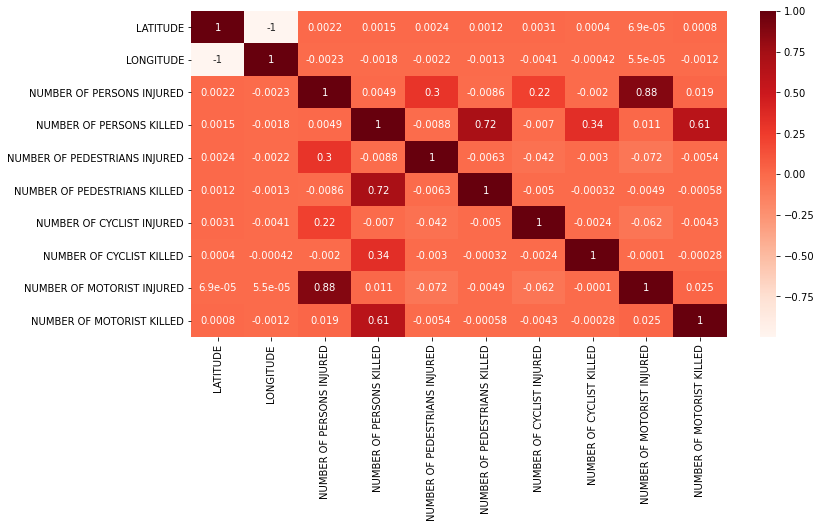

In [81]:
#Heatmap of our data

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap="Reds" )

In [82]:
df.max()

CRASH DATE                          12/31/2020
CRASH TIME                                9:59
BOROUGH                          STATEN ISLAND
LATITUDE                               40.9129
LONGITUDE                                    0
NUMBER OF PERSONS INJURED                   11
NUMBER OF PERSONS KILLED                     1
NUMBER OF PEDESTRIANS INJURED                4
NUMBER OF PEDESTRIANS KILLED                 1
NUMBER OF CYCLIST INJURED                    2
NUMBER OF CYCLIST KILLED                     1
NUMBER OF MOTORIST INJURED                  11
NUMBER OF MOTORIST KILLED                    1
dtype: object

In [83]:
df.min()

CRASH DATE                       01/01/2019
CRASH TIME                             0:00
BOROUGH                               BRONX
LATITUDE                                  0
LONGITUDE                          -74.2515
NUMBER OF PERSONS INJURED                 0
NUMBER OF PERSONS KILLED                  0
NUMBER OF PEDESTRIANS INJURED             0
NUMBER OF PEDESTRIANS KILLED              0
NUMBER OF CYCLIST INJURED                 0
NUMBER OF CYCLIST KILLED                  0
NUMBER OF MOTORIST INJURED                0
NUMBER OF MOTORIST KILLED                 0
dtype: object

### Checking skewness ###

In [84]:
#Checking skewness
df.skew()

LATITUDE                        -20.253050
LONGITUDE                        20.285802
NUMBER OF PERSONS INJURED         3.215754
NUMBER OF PERSONS KILLED         27.388695
NUMBER OF PEDESTRIANS INJURED     4.354213
NUMBER OF PEDESTRIANS KILLED     38.328134
NUMBER OF CYCLIST INJURED         5.140774
NUMBER OF CYCLIST KILLED         80.461170
NUMBER OF MOTORIST INJURED        4.258316
NUMBER OF MOTORIST KILLED        44.956231
dtype: float64

### Checking Kurtosis ###

In [85]:
#Checking kurtosis
df.kurt()

LATITUDE                          408.883399
LONGITUDE                         409.766920
NUMBER OF PERSONS INJURED          17.385345
NUMBER OF PERSONS KILLED          748.186803
NUMBER OF PEDESTRIANS INJURED      21.445086
NUMBER OF PEDESTRIANS KILLED     1467.136482
NUMBER OF CYCLIST INJURED          26.042699
NUMBER OF CYCLIST KILLED         6472.399679
NUMBER OF MOTORIST INJURED         26.667405
NUMBER OF MOTORIST KILLED        2019.187442
dtype: float64

### Cities with their crime numbers ###

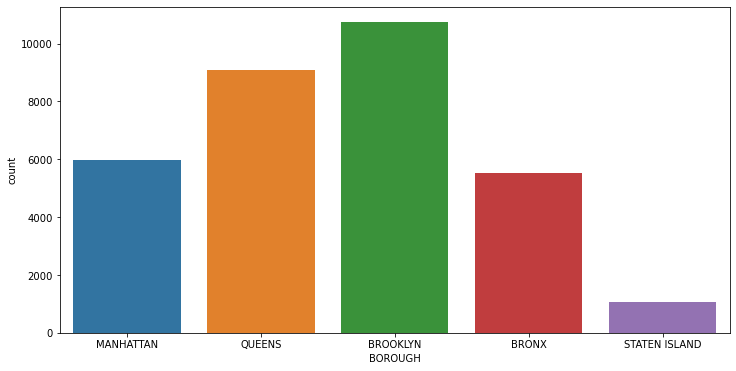

In [86]:
#Cities with their crime numbers
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x=df['BOROUGH'], data=df, ax=ax)
plt.show()

In [88]:
#Adding a new column for years
df["CRASH DATE"] = pd.to_datetime(df["CRASH DATE"])
df["year"] = df["CRASH DATE"].dt.year
df["year"].unique()

array([2018, 2021, 2019, 2020, 2016], dtype=int64)

In [89]:
#Adding a month column for months
df["month"] = df["CRASH DATE"].dt.month
df["month"].unique()

array([ 8, 12,  9,  5,  6,  7,  3, 10,  2, 11,  1,  4], dtype=int64)

### Checking for number of collisions by year ###

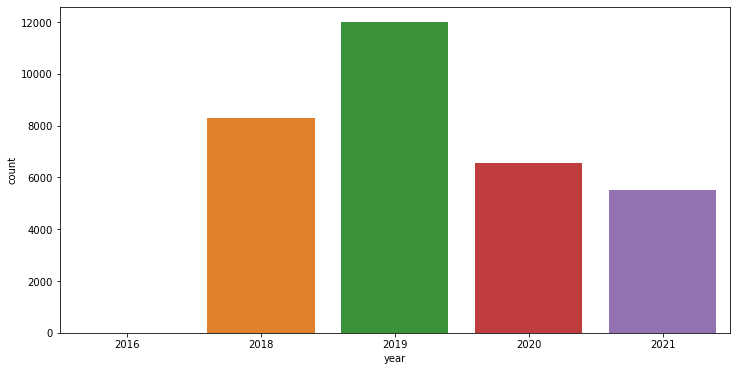

In [90]:
#Checking for number of collisions by year
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x=df['year'], data=df, ax=ax)
plt.show()

### Checking for number of collisions by month ###

In [ ]:
#Checking for number of collisions by month
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x=df['month'], data=df, ax=ax)
plt.show()

In [ ]:
persons_killed_by_year = df.groupby("year")["NUMBER OF PERSONS KILLED"].sum()
persons_killed_by_year

### Pie chart for persons killed by year ###

([<matplotlib.patches.Wedge at 0x15d1ee954c0>,
 [Text(1.1, 0.0, '2016'),
  Text(0.8899186877588753, 0.6465637858537406, '2018'),
  Text(-0.4049370232742901, 1.0227541284110062, '2019'),
  Text(-0.9639373540021144, -0.5299290306818474, '2020'),
  Text(0.7530017654698314, -0.8018655381043116, '2021')],
 [Text(0.6, 0.0, '0.0%'),
  Text(0.4854101933230228, 0.35267115592022213, '20.0%'),
  Text(-0.22087473996779458, 0.5578658882241851, '22.0%'),
  Text(-0.5257840112738805, -0.28905219855373493, '32.0%'),
  Text(0.4107282357108171, -0.43738120260235175, '26.0%')])

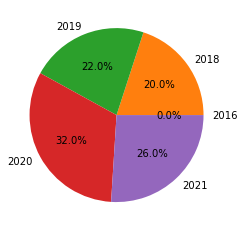

In [91]:
#Pie chart for persons killed by year
plt.pie(persons_killed_by_year, labels=["2016", "2018", "2019", "2020", "2021"], autopct='%1.1f%%')

<h1> <center> --- THE END --- </h1>